In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/go-emotions-google-emotions-dataset/go_emotions_dataset.csv


# Import Dependencies

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv('/kaggle/input/go-emotions-google-emotions-dataset/go_emotions_dataset.csv')

In [4]:
df.head()

,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,eew5j0j,That game hurt.,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,eemcysk,>sexuality shouldn’t be a grouping category I...,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ed2mah1,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,eeibobj,Man I love reddit.,False,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
df.isnull().sum().reset_index()

,index,0
0,id,0
1,text,0
2,example_very_unclear,0
3,admiration,0
4,amusement,0
5,anger,0
6,annoyance,0
7,approval,0
8,caring,0
9,confusion,0


# Data Cleaning

In [6]:
df.drop('id', inplace=True, axis=1)

In [7]:
df1 =df.iloc[:,2:-6]

In [8]:
df1.head()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

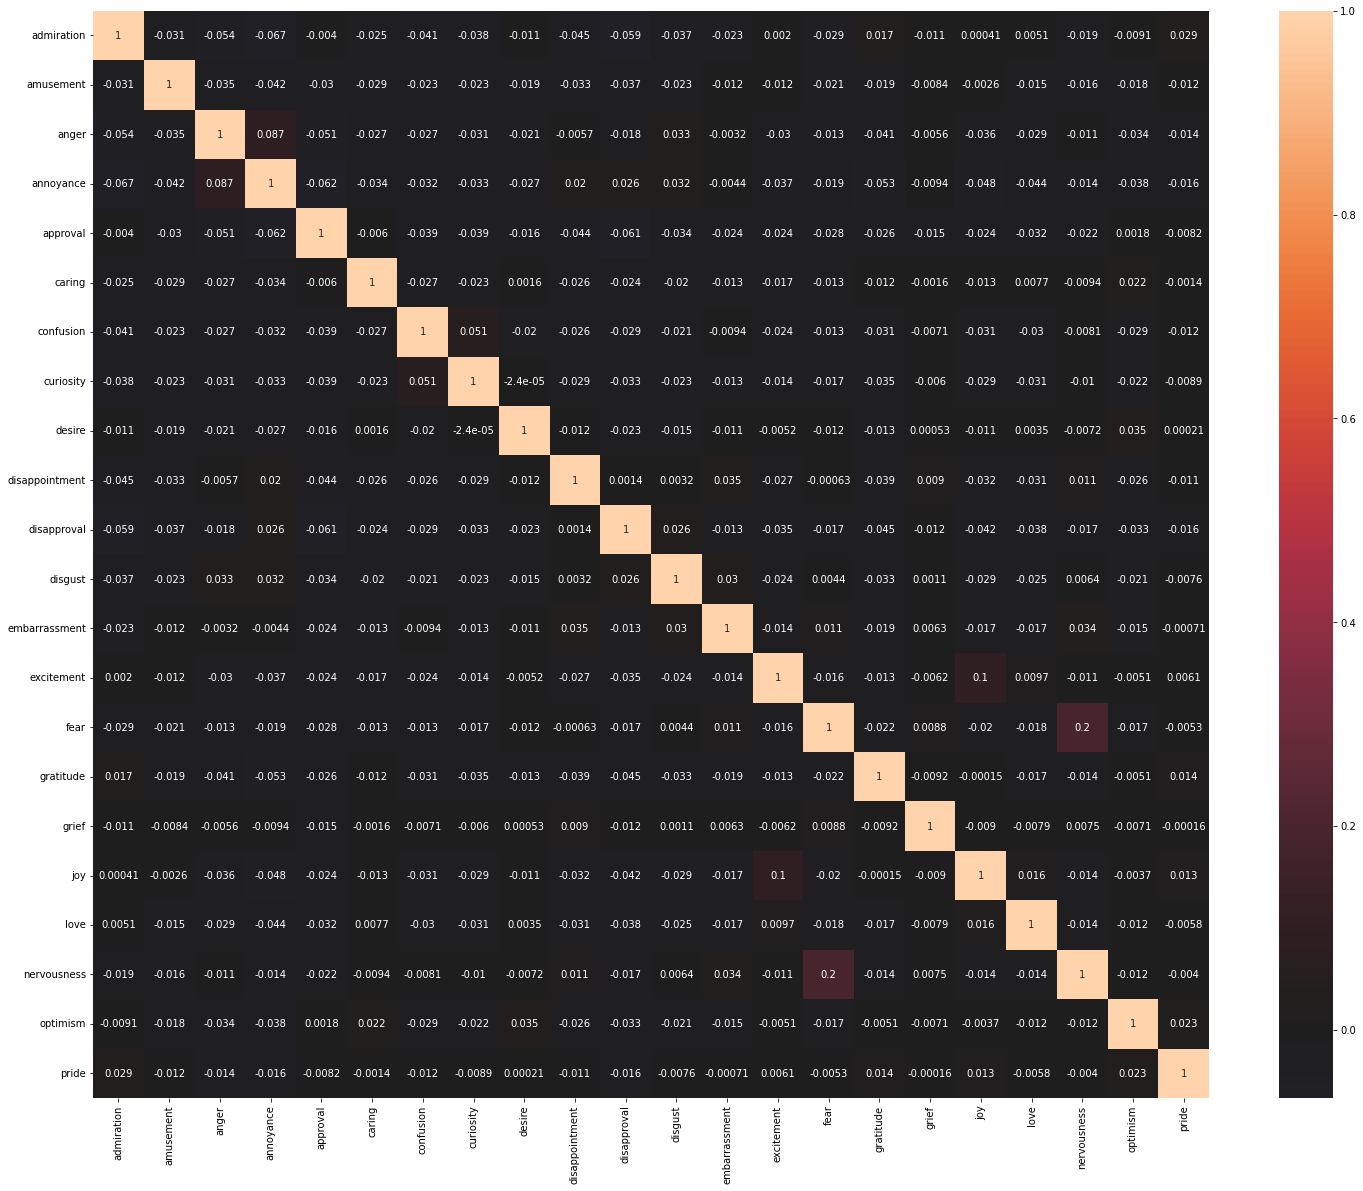

In [9]:
plt.figure(figsize=(25,20))
sns.heatmap(df1.corr(), center=0, annot=True)

# Feature Engineering

In [10]:
positive_col = ['admiration','amusement','approval','caring','curiosity','excitement','gratitude','joy','love','optimism','relief','surprise']
negative_col = ['sadness','pride','fear','embarrassment','disapproval','disappointment','confusion','annoyance','anger','nervousness','desire']
ambiguous_col = ['remorse','realization','grief','disgust']
neutral_col = ['neutral']

In [11]:
positive_col = df[positive_col]
negative_col = df[negative_col]
ambiguous_col = df[ambiguous_col]
neutral_col = df[neutral_col]

# Positive Emotion Analysis

In [12]:
emotion_counts = {}
for c in positive_col:
    emotion_counts[c]  = positive_col[c].value_counts().to_dict()[1]

In [13]:
plt.figure(figsize = (10,10) )
fig = px.bar(x=list(emotion_counts.keys()), y=list(emotion_counts.values()))
fig.update_layout(title = 'Go Emotions', height = 600, xaxis_title=" Positive Emotion", yaxis_title="Number of Texts")
fig.show()

<Figure size 720x720 with 0 Axes>

**Corss-validation**

In [14]:
positive_col['admiration'].value_counts()

0    194094
1     17131
Name: admiration, dtype: int64

# Negative Emotion Analysis

In [15]:
emotion_counts = {}
for c in negative_col:
    emotion_counts[c]  = negative_col[c].value_counts().to_dict()[1]

In [16]:
plt.figure(figsize = (10,10) )
fig = px.bar(x=list(emotion_counts.keys()), y=list(emotion_counts.values()))
fig.update_layout(title = 'Go Emotions', height = 600, xaxis_title="Negative Emotion", yaxis_title="Number of Texts")
fig.show()

<Figure size 720x720 with 0 Axes>

**Cross-Validation**

In [17]:
negative_col['sadness'].value_counts()

0    204467
1      6758
Name: sadness, dtype: int64

# Is the text very unclear ?

In [18]:
df1 =df['example_very_unclear'].value_counts()

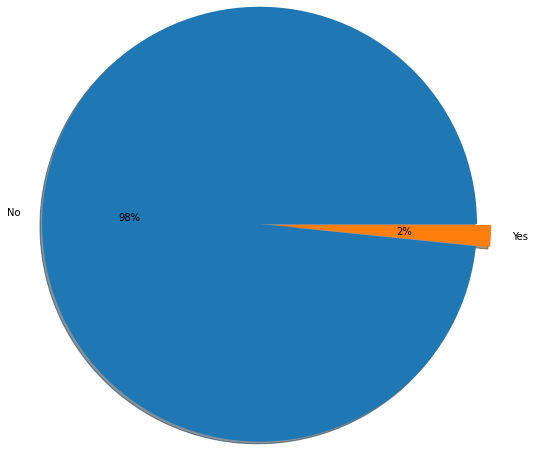

In [19]:
plt.figure(figsize = (5,5))
plt.pie(df1,labels = ['No','Yes'],autopct='%.0f%%' , radius = 2 ,explode = (0.1,0.03),shadow = True)
plt.show()

# Thank you !!
Please upvote if you liked my work :):)